# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [42]:
!pip install tensorflow scikit-learn matplotlib

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import layers, models
import tensorflow as tf
import keras

## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [44]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression
train_images_flat = train_images.reshape((train_images.shape[0],-1))
train_test_flat = train_images.reshape((test_images.shape[0],-1))

In [18]:
model_logist = LogisticRegression(max_iter=1000)

In [45]:
model_logist.fit(train_images_flat, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
train_images_flat.shape

(60000, 784)

In [47]:
train_labels.shape

(60000,)

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [48]:
X_valid, X_train = train_images[:2000] , train_images[2000:]
y_valid, y_train = train_labels[:2000], train_labels[2000:]

In [30]:
X_train.shape

(58000, 28, 28)

In [50]:
model = models.Sequential([
                          layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
                          layers.MaxPool2D(2,2),
                          layers.Flatten(),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(10, activation="softmax")
                          ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │          86,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,090 (340.20 KB)

 Trainable params: 87,090 (340.20 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [53]:
# Train the model
model_fit=model.fit(X_train, y_train, batch_size=2000, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8221 - loss: 0.5721 - val_accuracy: 0.8290 - val_loss: 0.5120
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 986ms/step - accuracy: 0.8405 - loss: 0.4907 - val_accuracy: 0.8540 - val_loss: 0.4458
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 983ms/step - accuracy: 0.8507 - loss: 0.4507 - val_accuracy: 0.8565 - val_loss: 0.4300
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8568 - loss: 0.4282 - val_accuracy: 0.8585 - val_loss: 0.4114
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 977ms/step - accuracy: 0.8646 - loss: 0.4026 - val_accuracy: 0.8685 - val_loss: 0.3917
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8700 - loss: 0.3839 - val_accuracy: 0.8695 - val_loss: 0.3855
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 967ms/step - accuracy: 0.8747 - loss: 0.3699 - val_accuracy: 0.8740 - val_loss: 0.3760
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 986ms/step - accuracy: 0.8749 - loss: 0.3676 - val_accuracy: 0.8

## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

In [54]:
predict = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [57]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8893 - loss: 0.3390


[0.34316131472587585, 0.881600022315979]

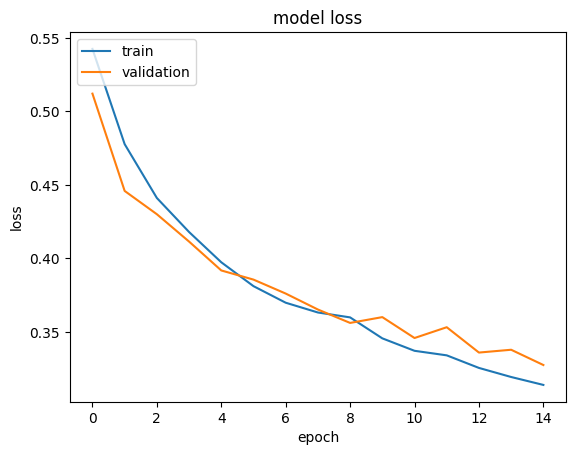

In [56]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

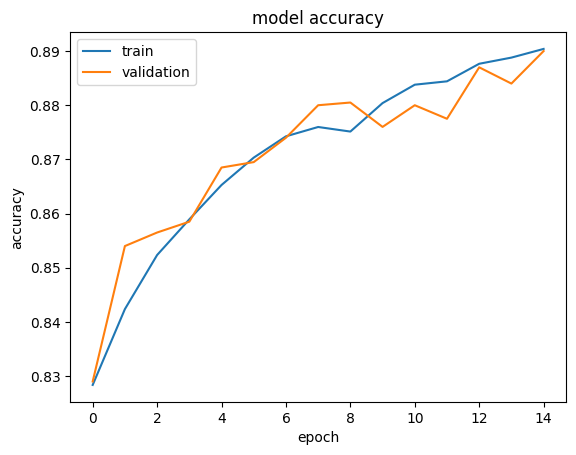

In [55]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
model.save('my_model.keras')

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.